```Date 25/04/23```
<p>Name:- Krishna Mundada<p>
<p>Roll No:- 45 </p>
<p>Batch:- E3</p>
<p>Practical 5</p>
<p>Topic:- Regularization </p>
<hr>
<hr>

Write a program to implement L1, L2 regularization, Early stopping, Dropout on a feed forward neural network on sonar dataset. Use Sequential layer and create a dense network. 
1. Use 3 hidden layers. 
2. Don't Use autoencoder and produce results. 
3. Iteration = 100 
4. Early stopping (stop when 5 consecutive values are same) 
5. Apply drop-out on 1st hidden layer.

Print Table to show each case train and test accuracy.

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

In [ ]:
# # load dataset
# dataframe = pd.read_csv("./sonar.csv", header=None)
# dataset = dataframe.values
# # split into input (X) and output (Y) variables
# X = dataset[:,0:60].astype(float)
# Y = dataset[:,60]

In [5]:
sns.set_style('darkgrid')

colors = ["#9b5de5", "#f15bb5", "#fee440", "#00bbf9", "#00f5d4"]

In [6]:
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)

In [7]:
# Load the Sonar dataset
X,y = make_classification(n_samples=208, n_features=60, n_informative=60, n_redundant=0, n_classes=2,random_state=42)
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
def SimpleSequentialModel():
        nn = tf.keras.models.Sequential([
            tf.keras.layers.Dense(32, input_dim=60, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        nn._name = "SimpleSequentialModel"

        # Compile the model
        nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # show the model summary
        nn.summary()

        start = time.perf_counter()
        history = nn.fit(X_train,y_train, validation_split=0.1, epochs=200, verbose=0)
        end = time.perf_counter()

        

        # Plot the loss and accuracy of training and validation
        plt.figure(figsize=(12, 8))

        plt.subplot(221).set_title('Training Loss')
        plt.plot(history.history['loss'], label='train loss', color=colors[0])

        plt.subplot(222).set_title('Training Accuracy')
        plt.plot(history.history['accuracy'], label='train accuracy', color=colors[1])

        plt.subplot(223).set_title('Validation Loss')
        plt.plot(history.history['val_loss'], label='val loss', color=colors[2])

        plt.subplot(224).set_title('Validation Accuracy')
        plt.plot(history.history['val_accuracy'], label='val accuracy', color=colors[3])

        plt.suptitle(nn._name)
        plt.show()

        print(f"time : {end - start}s")
        loss, accuracy = nn.evaluate(X_test,y_test, verbose=0)
        print(f'Testing Accuracy: {round(accuracy * 100, 2)}%, Testing Loss: {round(loss, 2)}')

Model: "SimpleSequentialModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                1952      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


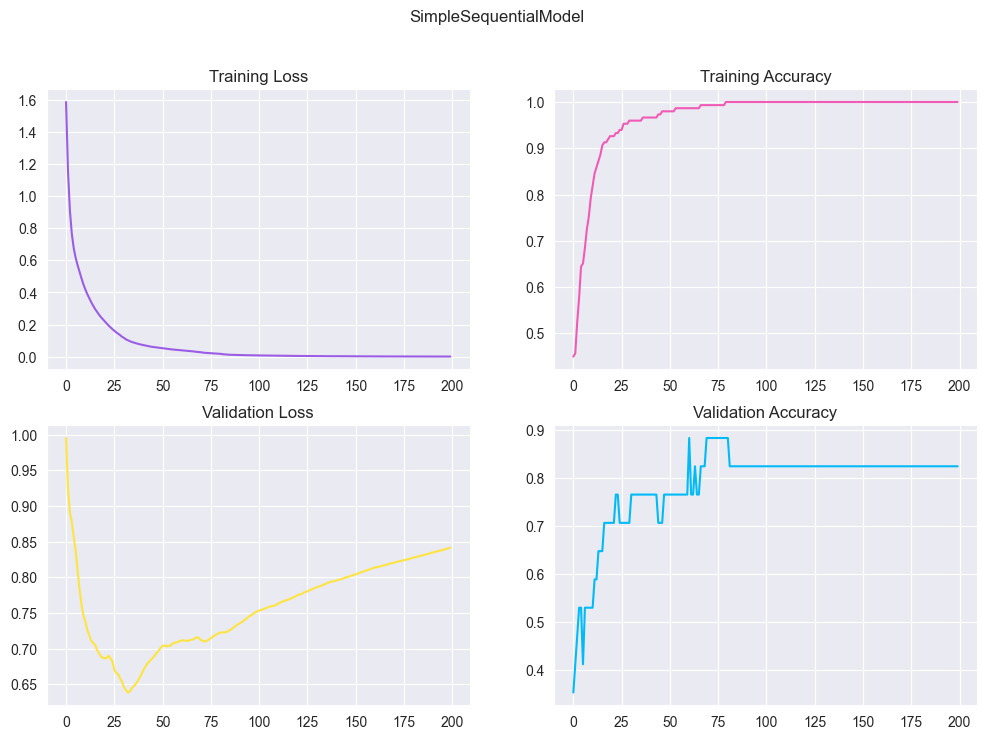

time : 16.60491810000002s
Testing Accuracy: 71.43%, Testing Loss: 1.63


In [11]:
SimpleSequentialModel()